# Project: Investigate a Dataset - TMDB Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

>I will be investigating the IMDB Movie data. This dataset contains over 10,000 movie records, with the following columns: 'id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'runtime', 'genres', 'production_companies', 'release_date', 'vote_count', 'vote_average', 'release_year', 'budget_adj', 'revenue_adj'.


### Question(s) for Analysis
I will be exploring the following questions from the provided data.


    1. What features are associated with high movie popularity over the years
    2. What features are assiocated with movies that have high revenue

### Loading packages, pandas, numpy, matplptlib etc

In [1]:
#import packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

> Cleaning and trimming of data


In [47]:
# Load your data and print out a few lines
df = pd.read_csv("datasets/tmdb-movies.csv")
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### The dataset conatains variables with multiple data types, next I will be checking the shape, missingness of the data and the data types of variables

In [48]:
#structure of the dataset
df.shape

(10866, 21)

In [49]:
#Perform operations to inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#####  some columns have a large count of missing data such as 'homepage', 'tagline', 'keyword', and 'production_companies', with 'homepage' having the highest count of null values. In the following cells, this will be corrected in the data cleaning stage

In [50]:
#count of null values per column
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [51]:
#print out column values and index
for i, v in enumerate(df):
    print(i,v)

0 id
1 imdb_id
2 popularity
3 budget
4 revenue
5 original_title
6 cast
7 homepage
8 director
9 tagline
10 keywords
11 overview
12 runtime
13 genres
14 production_companies
15 release_date
16 vote_count
17 vote_average
18 release_year
19 budget_adj
20 revenue_adj


In [52]:
#indexing to view truncated column (keywords)
df.iloc[:,9:].head()

,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [53]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09



### Data Cleaning
From the Data Wrangling process, I observed that some columns have a large count of missing data such as 'homepage', 'tagline', 'keyword', and 'production_companies', with 'homepage' having the highest count of null values. In the following cells, I will be removing these null values, because of their large count and  . There are few null values across multiple rows, which I will also be droping to achieve a cleaner data.

I also observed that the 'release_year' and 'release_year' columns have datatypes of objects and int respective. I will be converting the dataype of either of both columns to datetime


In [54]:
#dropping columns which large count of null values
# df.groupby('production_companies')['genres'].count()
df.drop(['homepage','keywords','tagline','production_companies',], axis=1, inplace=True)
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [55]:
#dropping rows with null values
df.dropna(inplace=True)

In [56]:
#converting release year and release date to datetime dataypes
df['release_date']= pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10725 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10725 non-null  int64         
 1   imdb_id         10725 non-null  object        
 2   popularity      10725 non-null  float64       
 3   budget          10725 non-null  int64         
 4   revenue         10725 non-null  int64         
 5   original_title  10725 non-null  object        
 6   cast            10725 non-null  object        
 7   director        10725 non-null  object        
 8   overview        10725 non-null  object        
 9   runtime         10725 non-null  int64         
 10  genres          10725 non-null  object        
 11  release_date    10725 non-null  datetime64[ns]
 12  vote_count      10725 non-null  int64         
 13  vote_average    10725 non-null  float64       
 14  release_year    10725 non-null  int64         
 15  bu

##### I have successfully handled missingness and data types. My dataset is now ready for analysis

In [57]:
#finding the count of unique release years in the dataset
df.release_date.dt.year.unique()

array([2015, 2014, 1977, 2009, 2010, 1999, 2001, 2008, 2011, 2002, 1994,
       2012, 2003, 1997, 2013, 1985, 2005, 2006, 2004, 1972, 1980, 2007,
       1979, 1984, 1983, 1995, 1992, 1981, 1996, 2000, 1982, 1998, 1989,
       1991, 1988, 1987, 2068, 1974, 1975, 2062, 2064, 2071, 1990, 2061,
       2060, 1976, 1993, 2067, 2063, 1986, 1973, 2070, 2065, 2069, 1978,
       2066], dtype=int64)

<a id='eda'></a>
## Exploratory Data Analysis

In the following section, I will compute statistcal reports and create visualizations that addresses the questions asked


### What features are associated with high movie popularity over the years

In the following steps we will be comparing multiple variables against popularity

In [58]:
# univariare analysis for popularity
def univar(var):
    ans= var.describe()
    return ans
univar(df.popularity)

count    10725.000000
mean         0.652852
std          1.005025
min          0.000188
25%          0.210766
50%          0.387304
75%          0.721548
max         32.985763
Name: popularity, dtype: float64

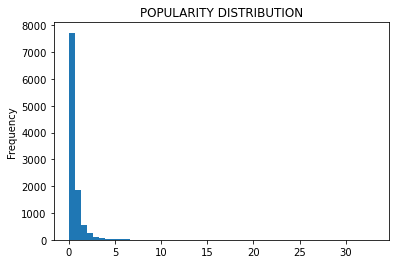

In [59]:
#Checking the distribution of popularity
df.popularity.plot(kind='hist',title='POPULARITY DISTRIBUTION', bins=50);

In [60]:
# Creating a function for correlation caluclations
def cor(var1,var2):
    corr = var1.corr(var2)
    return corr

In [61]:
#investigating the correlation betwwen popularity and budget

cor(df.popularity, df.budget)

0.5441887758517997

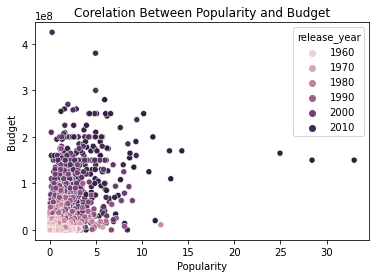

In [62]:
#plotting budget against popularity
ax= sns.scatterplot(x=df.popularity, y=df.budget, hue=df.release_year)
ax.set(xlabel='Popularity', ylabel='Budget', title='Corelation Between Popularity and Budget');

##### there is a strong postive correlation between budget and popluarity, which seems to increase by year

In [63]:
cor(df.popularity, df.runtime)

0.13801871947544259

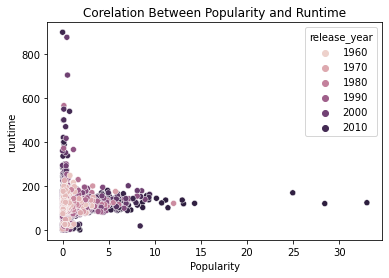

In [64]:
#plotting runtime against popularity
ax= sns.scatterplot(x=df.popularity, y=df.runtime, hue=df.release_year)
ax.set(xlabel='Popularity', ylabel='runtime', title='Corelation Between Popularity and Runtime');

##### there is a weak postive correlation between runtime and popluarity

In [65]:
cor(df.popularity, df.vote_count)

0.800612801049477

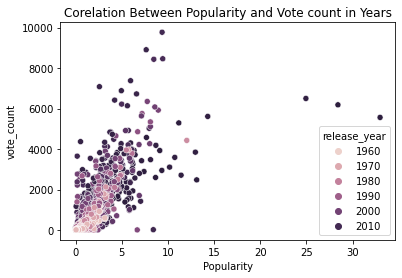

In [82]:
#plotting vote count against popluarity
ax= sns.scatterplot(x=df.popularity, y=df.vote_count, hue=df.release_year)
ax.set(xlabel='Popularity', ylabel='vote_count', title='Corelation Between Popularity and Vote count in Years');

##### there is a very strong postive correlation between vote count and popluarity, which seems to increase by year

In [66]:
#relationship between popularity and revenue
cor(df.revenue, df.popularity)

0.6628235076686019

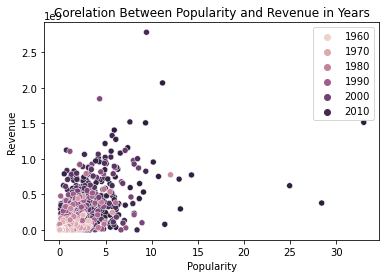

In [67]:
#plotting revenue against popularity
ax= sns.scatterplot(x=df.popularity, y=df.revenue, hue=df.release_year)
ax.set(xlabel='Popularity', ylabel='Revenue', title='Corelation Between Popularity and Revenue in Years')
ax.legend(loc='upper right');

##### there is a strong postive correlation between revenue and popluarity, which seems to increase by year

In [68]:
#Investigating years with highest popular movies
popular_movies_year = pd.DataFrame(df.groupby('release_year')['popularity'].mean())
popular_movies_year_10=popular_movies_year.sort_values('popularity', ascending=False).head(10)
popular_movies_year_10

,popularity
release_year,
2015,1.047620
2014,0.907467
2004,0.722438
2003,0.719083
1995,0.714641
1997,0.714033
2002,0.705411
2001,0.705034
2011,0.684052


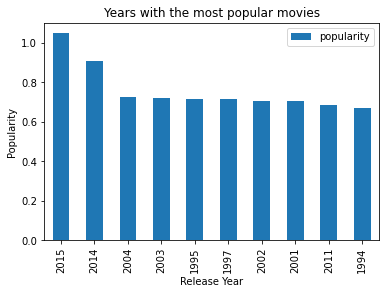

In [69]:
#plotting release year against popularity
popular_movies_year_10.plot(kind='bar', title='Years with the most popular movies', xlabel='Release Year', ylabel='Popularity');

##### Recent (released in 2014 and 2015) movies seam to have gained more poularity

In [70]:
#checking unque genres
df.genres.nunique()

2020

In [71]:
# investigating the how genres by release year is associated with popularity
populariy_year_genre = pd.DataFrame(df.groupby(['release_year','genres'])['popularity'].mean())
populariy_year_genre_20=populariy_year_genre.sort_values('popularity', ascending=False).head(20)
populariy_year_genre_20

popularity
release_year genres                                                       
2015         Action|Adventure|Science Fiction|Thriller           30.702849
2014         Adventure|Drama|Science Fiction                     24.949134
             Action|Science Fiction|Adventure                    14.311205
2015         Adventure|Science Fiction|Thriller                  13.112507
2014         Action|Adventure|Science Fiction                    12.971027
1977         Adventure|Action|Science Fiction                    12.037933
2015         Action|Adventure|Science Fiction|Fantasy            11.173104
2014         Science Fiction|Adventure|Thriller                  10.739009
2009         Action|Adventure|Fantasy|Science Fiction             9.432768
2010         Action|Thriller|Science Fiction|Mystery|Adventure    9.363643
2015         Western|Drama|Adventure|Thriller                     9.110700
2014         Adventure|Family|Animation|Action|Comedy             8.691294
2015         Science Fiction|Action|Thriller|Adventure            8.654359
2001         Adventure|Fantasy|Action                             8.575419
2008         Drama|Action|Crime|Thriller                          8.466668
2011         Action|Animation|Horror                              8.411577
2014         History|Drama|Thriller|War                           8.110711
2002         Adventure|Fantasy|Action                             8.095275
1994         Thriller|Crime                                       8.093754
2001         Adventure|Fantasy|Family                             8.021423

<AxesSubplot:title={'center':'Top 20 relationship between popularity and Genre'}, xlabel='Genres', ylabel='Popularity'>

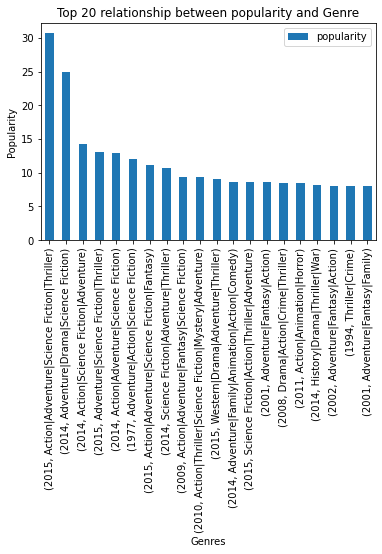

In [72]:
#plotting against genre and release year
populariy_year_genre_20.plot(kind='bar', xlabel='Genres', ylabel='Popularity', title='Top 20 relationship between popularity and Genre')

##### Action|Adventure|Science Fiction|Thriller(2015) and Adventure|Drama|Science Fiction (2014) have higher popularity

### What features are assiocated with movies that have high revenue

In the following section, I will be comparing multiple variable against revenue ro answer the above questions

In [73]:
#univariate analysis for revenue
univar(df.revenue)

count    1.072500e+04
mean     4.034253e+07
std      1.176814e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.500526e+07
max      2.781506e+09
Name: revenue, dtype: float64

In [74]:
#applying the correlation function created earlier
cor(df.revenue, df.budget)

0.7344360841237274

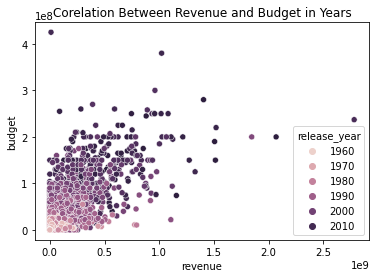

In [76]:
#plotting revenue against budget
ax= sns.scatterplot(x=df.revenue, y=df.budget, hue=df.release_year)
ax.set(xlabel='revenue', ylabel='budget', title='Corelation Between Revenue and Budget in Years');

#### there is a strong positive correlation between budget and revenue which increases by year

In [77]:
#relationship between revenue and vote count
cor(df.revenue, df.vote_count)

0.7908734254374565

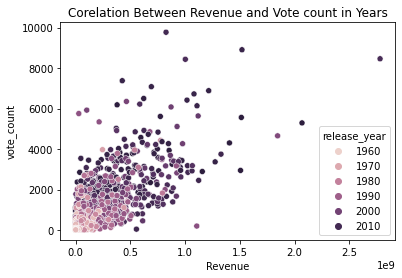

In [78]:
#plotting Revenue against vote count
ax= sns.scatterplot(x=df.revenue, y=df.vote_count, hue=df.release_year)
ax.set(xlabel='Revenue', ylabel='vote_count', title='Corelation Between Revenue and Vote count in Years');

#### there is a strong positive correlation between votecount and revenue which seems to increase by year

In [79]:
#relationship between revenue and runtime
cor(df.revenue, df.runtime)

0.1641377841970088

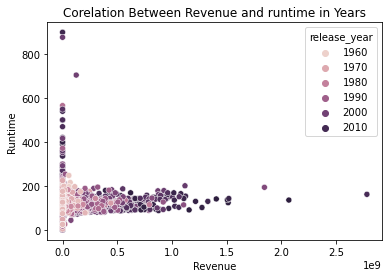

In [80]:
#plotting Revenue against Runtime
ax= sns.scatterplot(x=df.revenue, y=df.runtime, hue=df.release_year)
ax.set(xlabel='Revenue', ylabel='Runtime', title='Corelation Between Revenue and runtime in Years');

#### there is a weak positive correlation between runtime and revenue with no significant increase by year

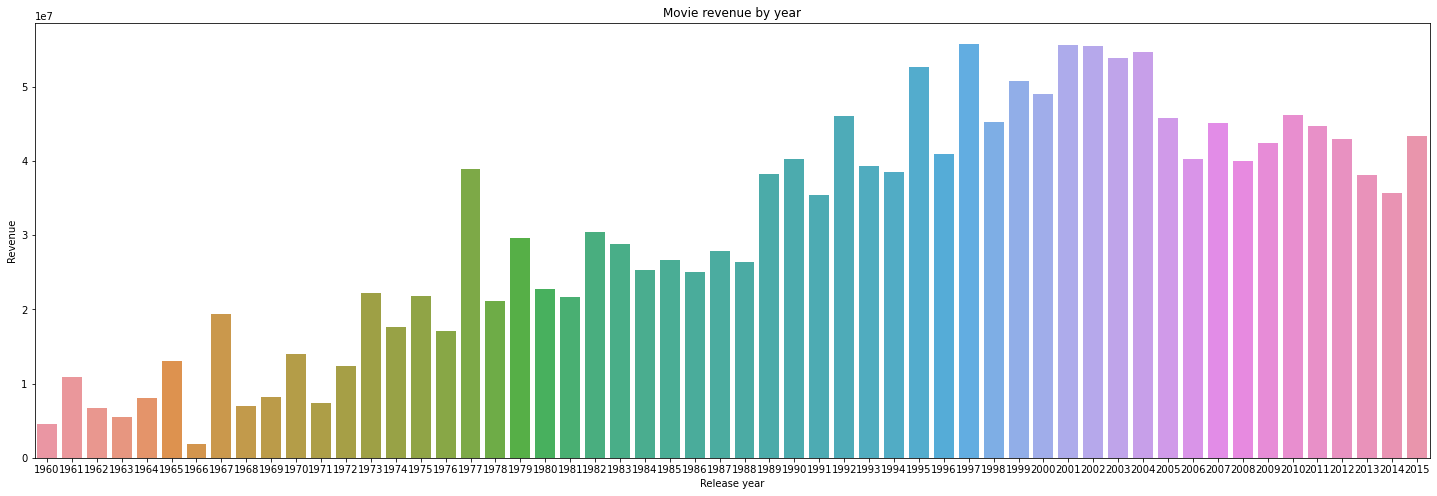

In [81]:
# Investigating yearly movie revenue
yearly_mean_revenue=pd.DataFrame(df.groupby('release_year')['revenue'].mean()).reset_index()
yearly_mean_revenue
fig, ax = plt.subplots(figsize=(25,8))
ax= sns.barplot(x=yearly_mean_revenue.release_year, y=yearly_mean_revenue.revenue)
ax.set(xlabel='Release year', ylabel='Revenue', title='Movie revenue by year');

##### top 4 years with the highest revenue are 1997,2001, 2002 and 2015

<a id='conclusions'></a>
## Conclusions

1. There is a positive correlation between movie popularity and budget
2. Movie genres Action|Adventure|Science fiction seem to have higher popularity of over the years
3. Movies with High budget are associated with high revenues
4. Revenue and movie popularity have a positive correlation
5. The most recent years (2015 and 2014) produced the most popular movies

### Limitations
My exploration was centered on discriptive analysis of the movie data. A predictive analysis will outcomes such as which genres will be popular in a given future year.



In [35]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1